In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [110]:
#Lectura de datos 
data = pd.read_csv('DEPURACION_FINAL.csv', sep=',')
data

,AÑO,MES,DIA,FECHA,HORA,KW-H
0,2015,1,jueves,1,0,3200
1,2015,1,jueves,1,1,3200
2,2015,1,jueves,1,2,2400
3,2015,1,jueves,1,3,2400
4,2015,1,jueves,1,4,2400
...,...,...,...,...,...,...
43819,2019,12,martes,31,19,3400
43820,2019,12,martes,31,20,3600
43821,2019,12,martes,31,21,3800
43822,2019,12,martes,31,22,4000


In [111]:
#Transformaciones previas 
data['KW-H'] = [valor.replace(",", ".") for valor in data['KW-H'] ]
data['KW-H'] = [float(valor) for valor in data['KW-H'] ]
data

,AÑO,MES,DIA,FECHA,HORA,KW-H
0,2015,1,jueves,1,0,3200.0
1,2015,1,jueves,1,1,3200.0
2,2015,1,jueves,1,2,2400.0
3,2015,1,jueves,1,3,2400.0
4,2015,1,jueves,1,4,2400.0
...,...,...,...,...,...,...
43819,2019,12,martes,31,19,3400.0
43820,2019,12,martes,31,20,3600.0
43821,2019,12,martes,31,21,3800.0
43822,2019,12,martes,31,22,4000.0


In [14]:
# data['AÑO'] = pd.to_numeric(data['AÑO'])
# data

,AÑO,MES,DIA,FECHA,HORA,KW-H
0,2015,1,jueves,1,0,3200.0
1,2015,1,jueves,1,1,3200.0
2,2015,1,jueves,1,2,2400.0
3,2015,1,jueves,1,3,2400.0
4,2015,1,jueves,1,4,2400.0
...,...,...,...,...,...,...
43819,2019,12,martes,31,19,3400.0
43820,2019,12,martes,31,20,3600.0
43821,2019,12,martes,31,21,3800.0
43822,2019,12,martes,31,22,4000.0


[[<matplotlib.axis.XTick at 0x7f7876197950>]]

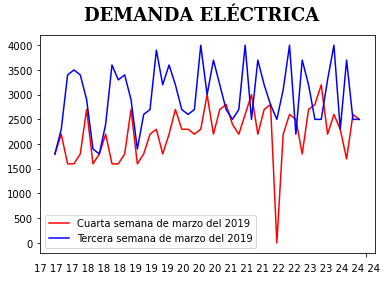

In [196]:
#Figura 5.2: Curva demanda eléctrica semanal
#Tomamos la tercera y cuarta semana del mes de diciembre del 2019 
# Fecha 25-31 de diciembre (7 dias)  de 17H-23H| 17-23 de diciembre (7 dias)  de 17H-23H
mes = 3
fecha_inicio = 18
fecha_fin = 24
year = 2019
hora_inicio = 17

data_ter_sem_dic = data[(data['FECHA'] >=fecha_inicio) & 
                         (data['FECHA'] <=fecha_fin) & 
                             (data['MES'] == mes )& 
                             (data['AÑO'] == year) & 
                             (data['HORA'] >=hora_inicio)]
data_cuar_sem_dic = data[(data['FECHA'] >=fecha_fin + 1) &  
                         (data['MES'] == mes )& 
                         (data['AÑO'] == year) & 
                         (data['HORA'] >=hora_inicio)]
data_cuar_sem_dic = data_cuar_sem_dic.sort_values(['HORA','FECHA'])
data_ter_sem_dic = data_ter_sem_dic.sort_values(['HORA', 'FECHA'])

data_ter_sem_dic['HORA'] = data_ter_sem_dic['HORA'].apply(str)
data_cuar_sem_dic['HORA'] = data_cuar_sem_dic['HORA'].apply(str)

#Creamos nuevo campo para que los valores de x en la grafica no se sobrepongan 
data_ter_sem_dic['HORA-FECHA'] = data_ter_sem_dic['HORA'].str.cat(data_ter_sem_dic['DIA'], sep=' ')
data_cuar_sem_dic['HORA-FECHA'] = data_cuar_sem_dic['HORA'].str.cat(data_cuar_sem_dic['DIA'], sep=' ')

#Grafica Hora-dia VS Consumo
fig, ax_52 = plt.subplots()

ax_52.plot(data_cuar_sem_dic['HORA-FECHA'], 
         data_cuar_sem_dic['KW-H'], 
         color = 'red', 
         label = 'Cuarta semana de marzo del 2019')
ax_52.plot(data_ter_sem_dic['HORA-FECHA'], 
         data_ter_sem_dic['KW-H'], 
         color = 'blue', 
         label = 'Tercera semana de marzo del 2019')
plt.suptitle('DEMANDA ELÉCTRICA',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.xlabel('17 17 17 18 18 18 19 19 19 20 20 20 21 21 21 22 22 23 23 24 24 24')
plt.legend()
ax_52.set(xticks ='')

In [197]:
#Tabla 5.1  Análisis descriptiva con datos reales de la demanda eléctrica
data.describe()['KW-H']
maximo = np.max(data['KW-H'])
print('Máximo = {}'.format(maximo))
minimo = np.min(data['KW-H'])
print('Mínimo = {}'.format(minimo))
# q75, q25 = np.percentile(data['KW-H'], [75, 25])
# rango = q75 - q25
rango = maximo - minimo
print('Rango = {}'.format(rango))
media = np.mean(data['KW-H'])
print('Media = {}'.format(media))
mediana = data['KW-H'].median()
print('Mediana = {}'.format(mediana))
varianza = data['KW-H'].var()
print('Varianza = {}'.format(varianza))
std = np.std(data['KW-H'])
print('Desviación Estándar = {}'.format(std))
coef_var = np.std(data['KW-H']) /np.mean(data['KW-H']) * 100
print('Coeficiente de variación = {} %'.format(coef_var))
lim_max, lim_min = np.percentile((data['KW-H']), [75, 25])
lim_max = media + 1 * std
lim_min = media - 1 * std
print('Límite máximo = {}'.format(lim_max))
print('Límite mínimo = {}'.format(lim_min))

data.describe()['KW-H']


Máximo = 4800.0
Mínimo = 0.0
Rango = 4800.0
Media = 2871.577498630865
Mediana = 3000.0
Varianza = 1465977.1211400968
Desviación Estándar = 1210.7616072837716
Coeficiente de variación = 42.1636402939168 %
Límite máximo = 4082.339105914637
Límite mínimo = 1660.8158913470936


count    43824.000000
mean      2871.577499
std       1210.775421
min          0.000000
25%       2200.000000
50%       3000.000000
75%       4000.000000
max       4800.000000
Name: KW-H, dtype: float64

[[<matplotlib.axis.XTick at 0x7f787688a910>]]

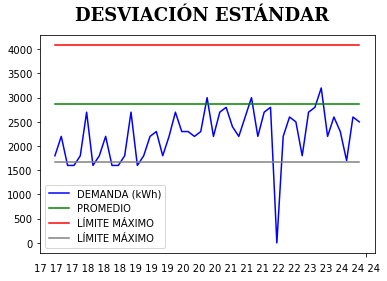

In [204]:
#Figura 5.3: Desviación estándar de datos de la semana en estudio
def funcionConstante(x, constante):
    return constante

datos_53 = data_cuar_sem_dic['HORA-FECHA']

fig, ax_53 = plt.subplots()

ax_53.plot(data_cuar_sem_dic['HORA-FECHA'], 
         data_cuar_sem_dic['KW-H'], 
         color = 'blue', 
         label = 'DEMANDA (kWh)')
ax_53.plot(data_cuar_sem_dic['HORA-FECHA'], 
         [funcionConstante(x, media) for x in datos_53], 
         color = 'green', 
         label = 'PROMEDIO')

ax_53.plot(data_cuar_sem_dic['HORA-FECHA'], 
         [funcionConstante(x, lim_max) for x in datos_53], 
         color = 'red', 
         label = 'LÍMITE MÁXIMO')

ax_53.plot(data_cuar_sem_dic['HORA-FECHA'], 
         [funcionConstante(x, lim_min) for x in datos_53], 
         color = 'gray', 
         label = 'LÍMITE MÁXIMO')


plt.suptitle('DESVIACIÓN ESTÁNDAR',
            fontsize = 18,
            fontweight = 'bold',
            fontfamily='serif')
plt.xlabel('17 17 17 18 18 18 19 19 19 20 20 20 21 21 21 22 22 23 23 24 24 24')
plt.legend()
ax_53.set(xticks ='')